## Phase 1: Data Preprocessing and Cleaning

In [16]:
# Import Python Lib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sb 

#### Step 1:  Load and Inspect the Data

In [59]:
# Load the CSV file
df = pd.read_csv('sales_data.csv')

# View first few rows
df.head()


,Customer_ID,Customer_Name,Region,Total_Spend,Purchase_Frequency,Marketing_Spend,Seasonality_Index,Churned
0,101,John Doe,North,5000,12,2000,1.2,No
1,102,Jane Smith,South,3000,8,1500,1.0,Yes
2,103,Sam Brown,East,4500,10,1800,1.1,No
3,104,Linda Johnson,West,2500,5,1000,0.9,Yes
4,105,Michael Lee,North,7000,15,2500,1.3,No


In [58]:
# Basic info about structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Customer_ID         16 non-null     int64   
 1   Customer_Name       16 non-null     object  
 2   Region              16 non-null     object  
 3   Total_Spend         16 non-null     int64   
 4   Purchase_Frequency  16 non-null     int64   
 5   Marketing_Spend     16 non-null     int64   
 6   Seasonality_Index   16 non-null     float64 
 7   Churned             16 non-null     category
dtypes: category(1), float64(1), int64(4), object(2)
memory usage: 1.1+ KB


#### Step 2: Check for Missing Values & Duplicates

In [23]:
# Check for missing values
df.isnull().sum()

Customer_ID           0
Customer_Name         0
Region                0
Total_Spend           0
Purchase_Frequency    0
Marketing_Spend       0
Seasonality_Index     0
Churned               0
dtype: int64

In [29]:
# Check for duplicate rows
df.duplicated().sum()



0

####  Step 3: Fix Data Types and Standardize Categorical Values

In [30]:
# Clean text fields: strip whitespace and normalize case
df["Region"] = df["Region"].str.strip().str.title()
df["Churned"] = df["Churned"].str.strip().str.capitalize()

In [31]:
# Convert 'Churned' to categorical
df["Churned"] = df["Churned"].astype("category")

In [34]:
# Confirm changes
print("Unique values in Region:", df["Region"].unique())
print("Unique values in Churned:", df["Churned"].unique())
print(df.dtypes)

Unique values in Region: ['North' 'South' 'East' 'West']
Unique values in Churned: ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
Customer_ID              int64
Customer_Name           object
Region                  object
Total_Spend              int64
Purchase_Frequency       int64
Marketing_Spend          int64
Seasonality_Index      float64
Churned               category
dtype: object


#### Step 4: Summary Statistics and Outlier Check

In [37]:
# Summary statistics
df.describe()

,Customer_ID,Total_Spend,Purchase_Frequency,Marketing_Spend,Seasonality_Index
count,16.000000,16.000000,16.000000,16.000000,16.000000
mean,108.500000,4137.500000,9.500000,1675.000000,1.043750
std,4.760952,1396.125591,3.224903,484.424057,0.154785
min,101.000000,2500.000000,5.000000,1000.000000,0.800000
25%,104.750000,2975.000000,6.750000,1300.000000,0.900000
50%,108.500000,3900.000000,9.500000,1650.000000,1.050000
75%,112.250000,5075.000000,12.000000,2025.000000,1.200000
max,116.000000,7000.000000,15.000000,2500.000000,1.300000


##### Visualize Outliers with Boxplots

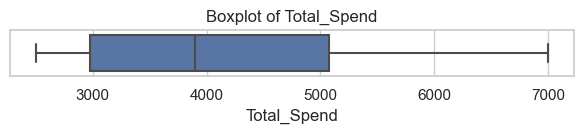

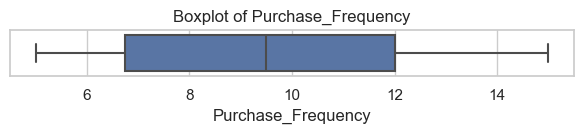

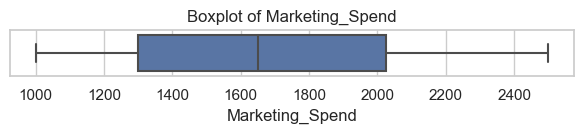

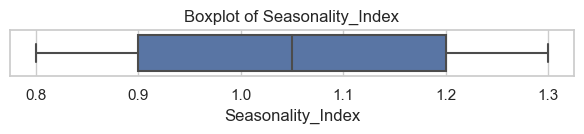

In [38]:


# Numerical columns
num_cols = ['Total_Spend', 'Purchase_Frequency', 'Marketing_Spend', 'Seasonality_Index']

# Boxplots
for col in num_cols:
    plt.figure(figsize=(6, 1.5))
    sb.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()


#### ✅ Final Check: Clean Dataset Summary

In [39]:
print("Data shape:", df.shape)
print("Column data types:")
print(df.dtypes)
print("First few cleaned records:")
print(df.head())


Data shape: (16, 8)
Column data types:
Customer_ID              int64
Customer_Name           object
Region                  object
Total_Spend              int64
Purchase_Frequency       int64
Marketing_Spend          int64
Seasonality_Index      float64
Churned               category
dtype: object
First few cleaned records:
   Customer_ID  Customer_Name Region  Total_Spend  Purchase_Frequency  \
0          101       John Doe  North         5000                  12   
1          102     Jane Smith  South         3000                   8   
2          103      Sam Brown   East         4500                  10   
3          104  Linda Johnson   West         2500                   5   
4          105    Michael Lee  North         7000                  15   

   Marketing_Spend  Seasonality_Index Churned  
0             2000                1.2      No  
1             1500                1.0     Yes  
2             1800                1.1      No  
3             1000                0.9    

## Phase 2: Exploratory Data Analysis (EDA)

#### Step 1: General Dataset Overview

In [41]:
# Basic statistical overview
df.describe(include='all')

,Customer_ID,Customer_Name,Region,Total_Spend,Purchase_Frequency,Marketing_Spend,Seasonality_Index,Churned
count,16.000000,16,16,16.000000,16.000000,16.000000,16.000000,16
unique,NaN,16,4,NaN,NaN,NaN,NaN,2
top,NaN,John Doe,North,NaN,NaN,NaN,NaN,No
freq,NaN,1,4,NaN,NaN,NaN,NaN,8
mean,108.500000,NaN,NaN,4137.500000,9.500000,1675.000000,1.043750,NaN
std,4.760952,NaN,NaN,1396.125591,3.224903,484.424057,0.154785,NaN
min,101.000000,NaN,NaN,2500.000000,5.000000,1000.000000,0.800000,NaN
25%,104.750000,NaN,NaN,2975.000000,6.750000,1300.000000,0.900000,NaN
50%,108.500000,NaN,NaN,3900.000000,9.500000,1650.000000,1.050000,NaN
75%,112.250000,NaN,NaN,5075.000000,12.000000,2025.000000,1.200000,NaN


In [43]:
# Churn rate
print("Churn Distribution:")
print(df["Churned"].value_counts(normalize=True) * 100)

Churn Distribution:
No     50.0
Yes    50.0
Name: Churned, dtype: float64


In [44]:
# Region distribution
print("Customer count by Region:")
print(df["Region"].value_counts())

Customer count by Region:
North    4
South    4
East     4
West     4
Name: Region, dtype: int64


####  Step 2: Visualize Target Variable (Churned)

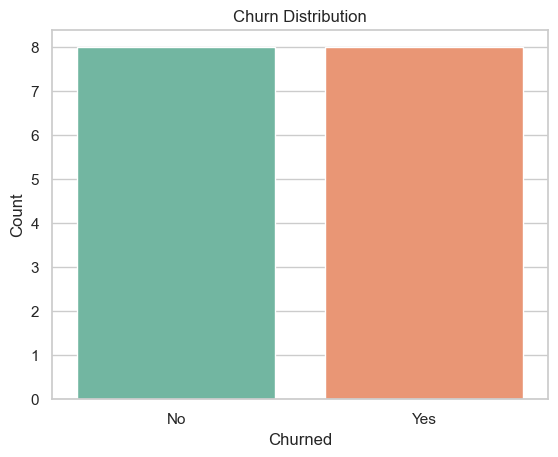

In [46]:
# Churn distribution bar plot
sb.countplot(data=df, x="Churned", palette="Set2")
plt.title("Churn Distribution")
plt.ylabel("Count")
plt.show()

#### Step 3: Categorical vs Target (Region vs Churned)

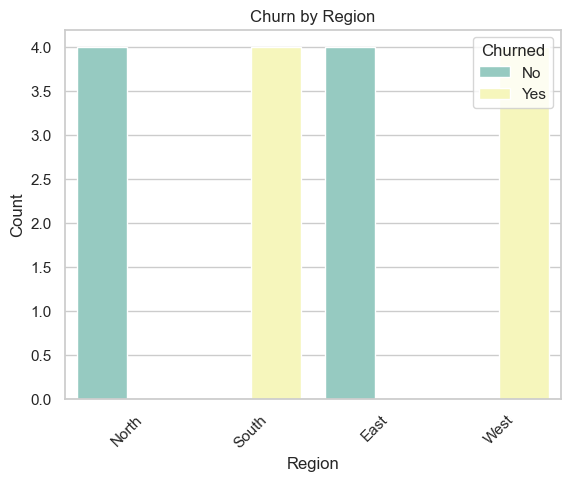

In [47]:
sb.countplot(data=df, x="Region", hue="Churned", palette="Set3")
plt.title("Churn by Region")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

####  Step 4: Correlation and Numeric Insights

In [48]:
# Correlation matrix
correlation = df.select_dtypes(include=['int64', 'float64']).corr()

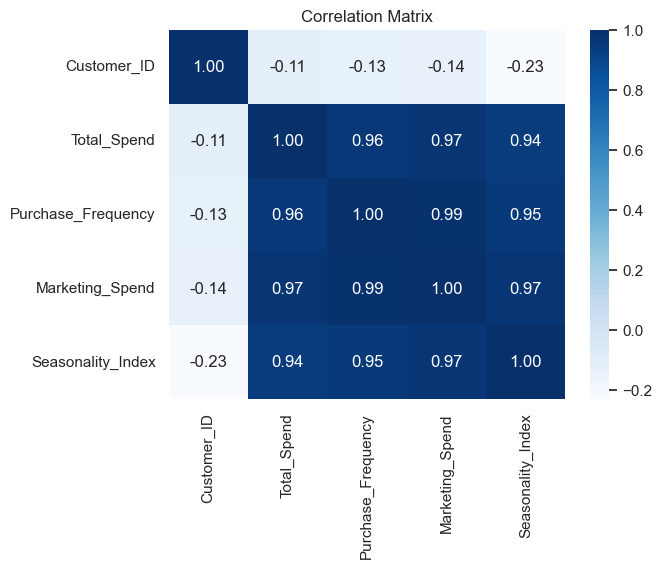

In [54]:
# Heatmap
sb.heatmap(correlation, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#### Step 5: Numeric Variables by Churn Status

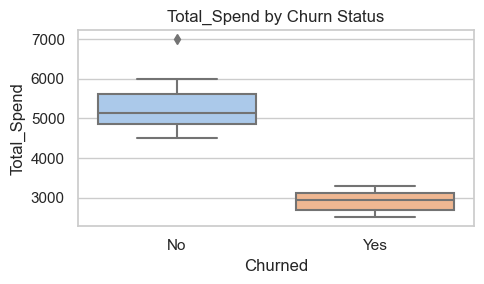

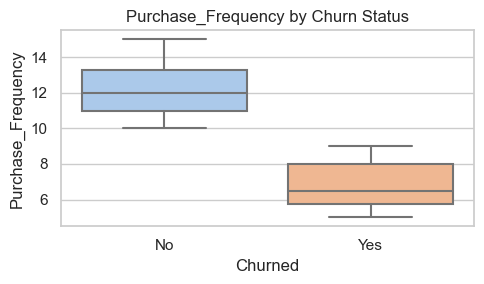

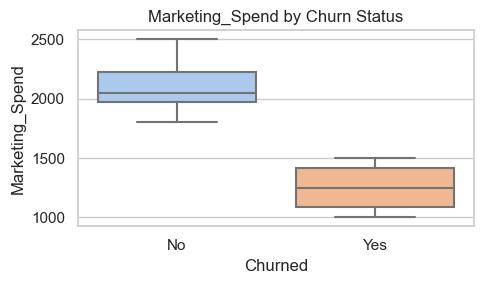

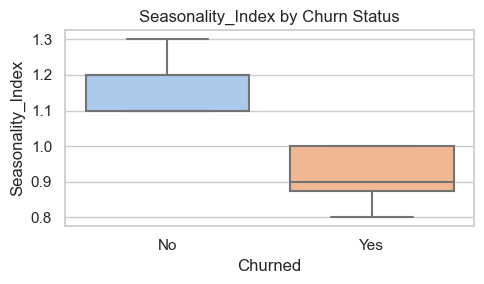

In [55]:
# Boxplots of numeric features by churn
num_cols = ['Total_Spend', 'Purchase_Frequency', 'Marketing_Spend', 'Seasonality_Index']

for col in num_cols:
    plt.figure(figsize=(5, 3))
    sb.boxplot(data=df, x='Churned', y=col, palette='pastel')
    plt.title(f'{col} by Churn Status')
    plt.tight_layout()
    plt.show()

#### Step 6: Pairwise Plots

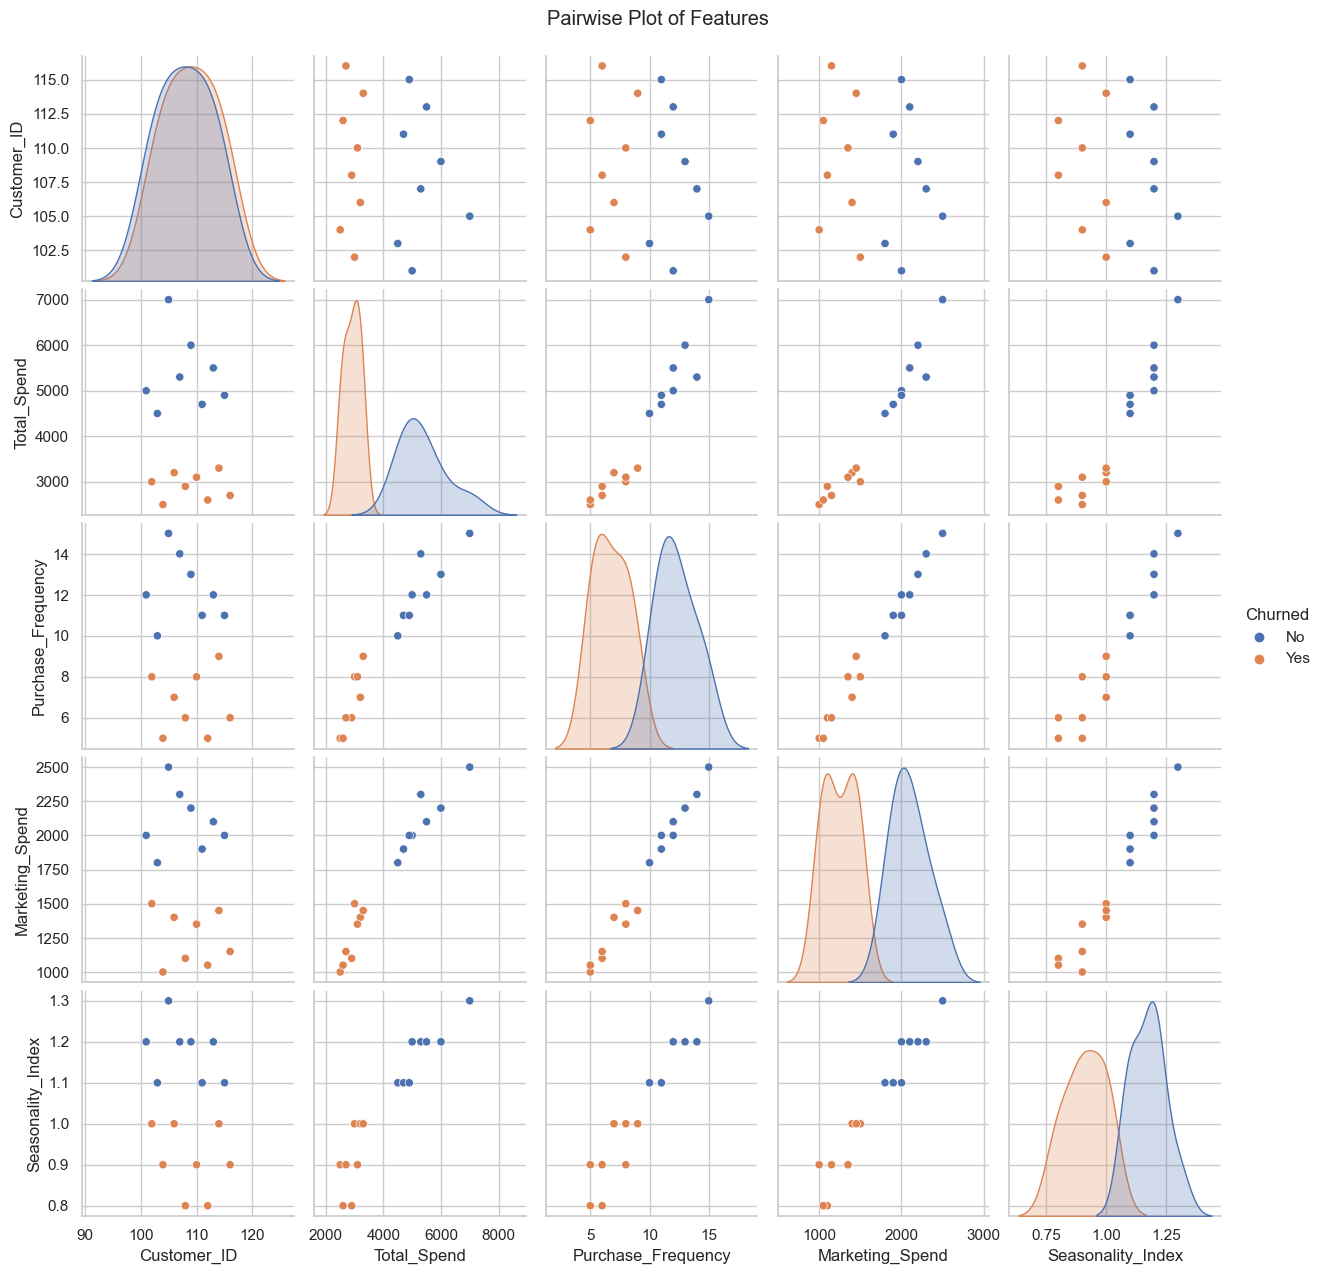

In [57]:
sb.pairplot(df, hue='Churned', diag_kind='kde')
plt.suptitle("Pairwise Plot of Features", y=1.02)
plt.show()

## Phase 3: Predictive Modeling for Sales Forecasting

#### Step 1: Linear Regression (Sales ~ Marketing + Seasonality)

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Features and target
X = df[['Marketing_Spend', 'Seasonality_Index']]
y = df['Total_Spend']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Evaluation
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


R2 Score: 0.7932581750365789
RMSE: 422.1203742895485


#### Step 2:  Logistic Regression (Churn Classification)

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Encode target
df['Churned_Encoded'] = LabelEncoder().fit_transform(df['Churned'])

# Features and target
features = ['Total_Spend', 'Marketing_Spend', 'Purchase_Frequency', 'Seasonality_Index']
X = df[features]
y = df['Churned_Encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict
y_pred = logreg.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Confusion Matrix:
 [[2 0]
 [0 2]]


C:\Users\smitp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Step 3:  Time Series Forecasting (ARIMA/Prophet)

In [62]:
pip install prophet



     ---------------------------------------- 13.3/13.3 MB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 94.5/94.5 kB 5.3 MB/s eta 0:00:00
     -------------------------------------- 954.8/954.8 kB 4.7 MB/s eta 0:00:00


#### Data Prep (Assuming monthly sales are available)

In [65]:
# Simulated conversion (replace with your actual data if Date is missing)
df['Date'] = pd.date_range(start='2023-01-01', periods=len(df), freq='M')

# Aggregate sales monthly
monthly_sales = df[['Date', 'Total_Spend']].set_index('Date').resample('M').sum()


####  A. ARIMA Forecasting

C:\Users\smitp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


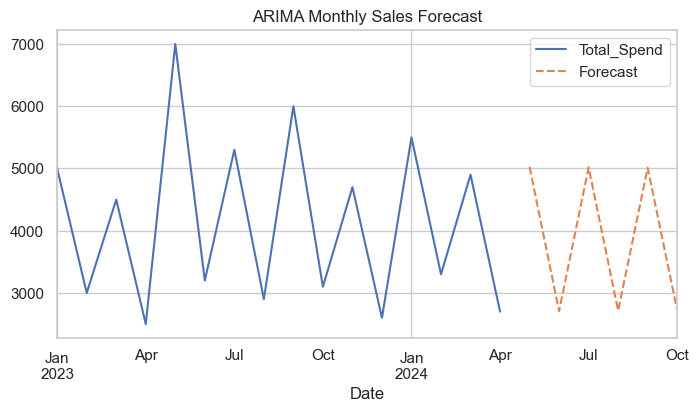

In [67]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit ARIMA
model = ARIMA(monthly_sales, order=(1,1,1))
model_fit = model.fit()

# Forecast next 6 months
forecast = model_fit.forecast(steps=6)

# Plot
monthly_sales.plot(label='Historical', figsize=(8,4))
forecast.plot(label='Forecast', linestyle='--')
plt.title("ARIMA Monthly Sales Forecast")
plt.legend()
plt.show()


####  B. Prophet Forecasting (Alternative)

14:09:38 - cmdstanpy - INFO - Chain [1] start processing
14:09:38 - cmdstanpy - INFO - Chain [1] done processing


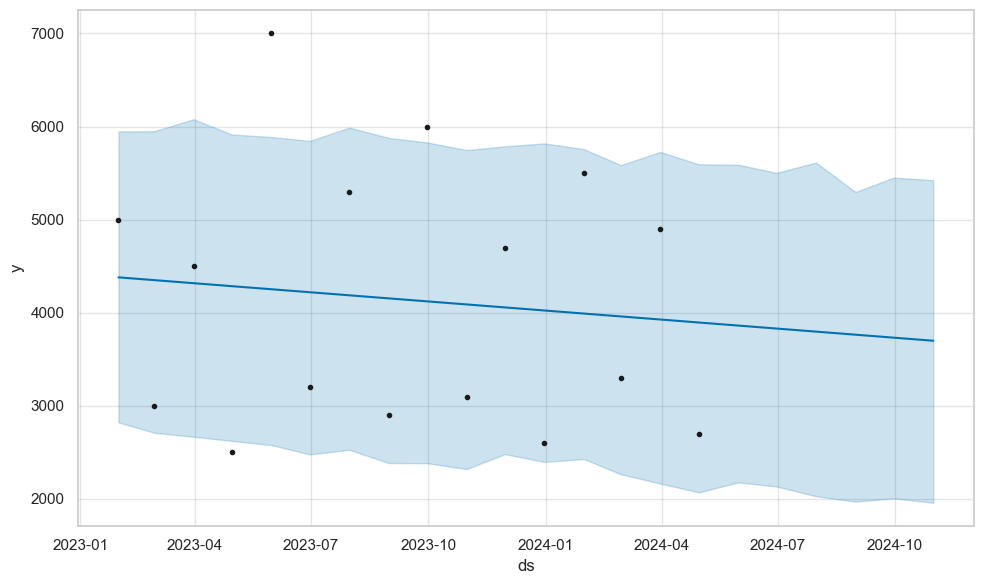

In [70]:
from prophet import Prophet

# Prophet requires columns: ds (date) and y (value)
prophet_df = monthly_sales.reset_index().rename(columns={"Date": "ds", "Total_Spend": "y"})

# Train model
m = Prophet()
m.fit(prophet_df)

# Create future dataframe
future = m.make_future_dataframe(periods=6, freq='M')
forecast = m.predict(future)

# Plot forecast
fig = m.plot(forecast)


## Phase 4: Statistical Analysis for Business Insights

#### Step 1: ANOVA: Compare Sales Across Regions

In [71]:
import scipy.stats as stats

# Group sales by region
groups = [df[df['Region'] == region]['Total_Spend'] for region in df['Region'].unique()]

# One-way ANOVA
f_stat, p_value = stats.f_oneway(*groups)

print("ANOVA F-statistic:", f_stat)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("Significant differences in sales across regions.")
else:
    print("No significant difference in sales across regions.")


ANOVA F-statistic: 39.719626168224295
P-value: 1.6512569414092805e-06
Significant differences in sales across regions.


#### Step 2:  Hypothesis Testing: Promotions vs Sales Growth

In [72]:
# Simulate promotion flag (example: assume if Marketing_Spend > X then promotion was active)
df['Promotion_Active'] = (df['Marketing_Spend'] > df['Marketing_Spend'].median()).astype(int)

# Group sales by promotion status
promo_sales = df[df['Promotion_Active'] == 1]['Total_Spend']
no_promo_sales = df[df['Promotion_Active'] == 0]['Total_Spend']

# Independent t-test
t_stat, p_val = stats.ttest_ind(promo_sales, no_promo_sales, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_val)

# Interpretation
if p_val < 0.05:
    print("Promotions significantly impact sales.")
else:
    print("No significant impact of promotions on sales.")


T-statistic: 8.018868232385392
P-value: 2.5654205224455728e-05
Promotions significantly impact sales.


#### Step 3: Factor Analysis: Identify Key Purchase Drivers

Factor Loadings:
          Total_Spend  Marketing_Spend  Purchase_Frequency  Seasonality_Index
Factor 1     0.972406         0.998248            0.992566           0.967166
Factor 2    -0.054165        -0.013650            0.065701          -0.068743


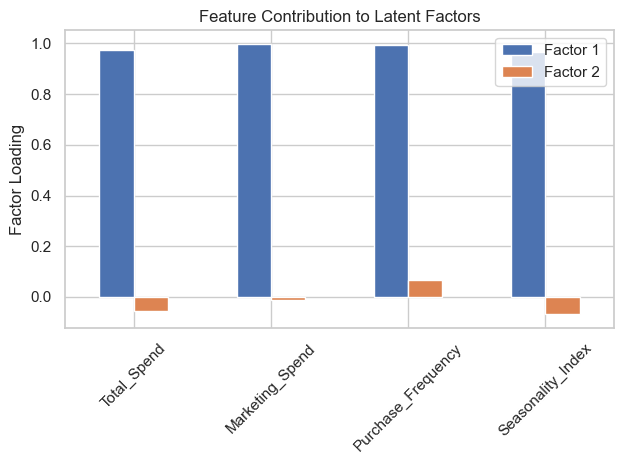

In [74]:
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select and scale features
features = ['Total_Spend', 'Marketing_Spend', 'Purchase_Frequency', 'Seasonality_Index']
X = df[features]
X_scaled = StandardScaler().fit_transform(X)

# Fit factor analysis with 2 components
fa = FactorAnalysis(n_components=2, random_state=42)
factors = fa.fit_transform(X_scaled)

# Factor loadings
loadings = pd.DataFrame(fa.components_, columns=features, index=['Factor 1', 'Factor 2'])
print("Factor Loadings:")
print(loadings)

# Optional: Visualize factor contributions
loadings.T.plot(kind='bar')
plt.title("Feature Contribution to Latent Factors")
plt.ylabel("Factor Loading")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Phase 5: Machine Learning for Customer Segmentation

#### Step 1: Decision Tree for Customer Segmentation

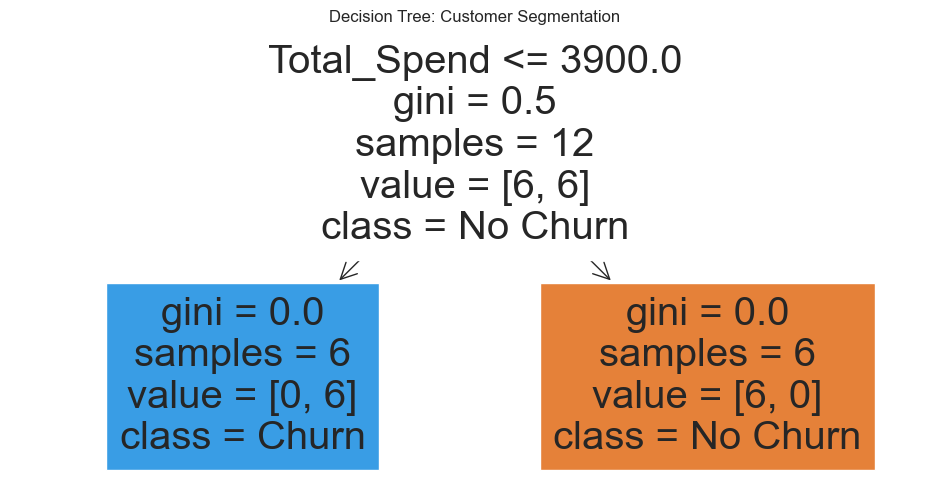

In [75]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Encode churn for segmentation
df['Churned_Encoded'] = df['Churned'].astype('category').cat.codes

# Features and target
features = ['Total_Spend', 'Marketing_Spend', 'Purchase_Frequency', 'Seasonality_Index']
X = df[features]
y = df['Churned_Encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(12, 6))
plot_tree(tree_model, feature_names=features, class_names=['No Churn', 'Churn'], filled=True)
plt.title("Decision Tree: Customer Segmentation")
plt.show()


#### Step 2: K-Means Clustering

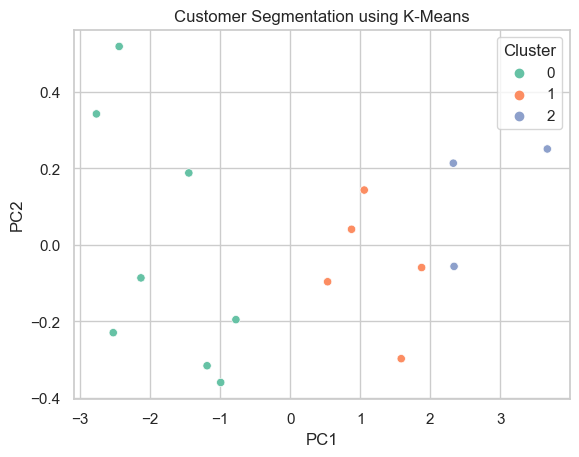

In [76]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Scale numeric features
X_cluster = df[['Total_Spend', 'Marketing_Spend', 'Purchase_Frequency', 'Seasonality_Index']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters (using first 2 PCA components)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)
df['PC1'], df['PC2'] = components[:, 0], components[:, 1]

sns.scatterplot(data=df, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.title("Customer Segmentation using K-Means")
plt.show()


####  Step 3: Ensemble Learning (Random Forest & XGBoost)

##### 3A. Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Confusion Matrix:
 [[2 0]
 [0 2]]


##### 3B. XGBoost

In [80]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [81]:
from xgboost import XGBClassifier

# Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Evaluate
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Confusion Matrix:
 [[2 0]
 [0 2]]


C:\Users\smitp\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [14:30:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [85]:
df.to_csv("final_sales_data.csv", index=False)

In [86]:
forecast[['ds', 'yhat']].to_csv("sales_forecast.csv", index=False)


In [88]:
# Prophet forecast DataFrame
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv("sales_forecast.csv", index=False)
